**Titanic Survivor Challenge**

Esse desafio visa a criação de um modelo de classificação para a predição de sobreviventes do navio Titanic analisando algumas variáveis:
    
1. PassangerId: Id único do passageiro
2. PClass: Classe que o passageiro viajou (1, 2 ou 3)
3. Name: Nome do passageiro
4. Age: Idade do passageiro
5. SibSp: Número de irmãos e cônjuges viajando junto do passageiro
6. Parch: Número de pai/mãe e filhos viajando junto do passageiro
7. Ticket: Número do ticket do passageiro
8. Fare: Quantidade de tarifas que o passageiro pagou para embarcar
9. Cabin: Número da cabine do passageio
10. Embarked: Inicial do nome do porto que o passageiro embarcou (S, Q, C)
11. Survived: 0 - Não sobreviviu, 1 - Sobreviviu -> É a variável que queremos prever.
    
Duas bases estão disponíveis:
    train.csv: Base de treinamento contendo a variável Survived
    test.csv: Base que queremos prever (não contém Survived)
    
Esse notebook foi adaptado de várias resoluções já existentes para o problema no Kaggle (referências no final).

In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

##Carregando os dados

Carregamos os dados utilizando a biblioteca Python Pandas que facilita a manipualção dos dados. Também criamos um dataset de combinação entre os dados de treino e teste para quando necessitarmos executar ações em ambos.

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Quais características são categóricas?**

Esses valores classificam as amostras em conjuntos de amostras semelhantes. Dentro das características categóricas, os valores são nominais, ordinais, com razão ou baseados em intervalos? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

- Survived, Sex, and Embarked. Ordinal: Pclass.

**Quais características são numéricas?**

Esses valores mudam de amostra para amostra. Dentro das características numéricas, os valores são discretos, contínuos ou baseados em timeseries? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

- Contínua: Age, Fare. Discreta: SibSp, Parch.

In [8]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Quais características misturam tipos distintos?**

São características que provavelmente necessitam de correção.

- Ticket é uma mistura de números e alfanuméricos. Cabine é alfanumérico.

**Quais características possuem erros ou "typos"?**

- Name pode conter erros de ortografia e algumas despadronizações, como o uso de aspas em algumas instâncias.

In [9]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Quais características possuem valores nulos?**

Essas características necessitam de correções.

- Cabin > Age > Embarked possuem um número de valores nulos (nessa ordem) no dataset de treino.
- Cabin > Age são incompletos no dataset de teste.

**Quais os tipos das nossas características?**

- Sete features são inteiros ou ponto flutuantes. Seis no caso da base de teste.
- Cinco features são strings (object).

In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

** Qual é a distribuição dos valores numéricos das características nas amostras? **

Isso nos ajuda a determinar, entre outras percepções iniciais, quão representativo é o conjunto de dados de treinamento do domínio real do problema.

- Total de amostras são 891 ou 40% do número real de passageiros a bordo do Titanic (2.224).
- Sobrevivido é uma característica categórica com 0 ou 1 valores.
- Cerca de 38% das amostras sobreviveram representativas da taxa de sobrevivência real em 32%.
- A maioria dos passageiros (> 75%) não viajou com pais ou filhos.
- Quase 30% dos passageiros tinham irmãos e / ou cônjuge a bordo.
- As tarifas variaram significativamente, com poucos passageiros (<1%) pagando até US $ 512.
- Poucos passageiros idosos (<1%) na faixa etária de 65 a 80 anos.

In [11]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Qual é a distribuição de recursos categóricos? **

- Os nomes são únicos em todo o conjunto de dados (count = unique = 891)
- Sexo variável como dois valores possíveis com 65% masculino (top = masculino, freq = 577 / contagem = 891).
- Os valores da cabine possuem vários dupicates nas amostras. Pode ser que vários passageiros compartilhavam uma cabine.
- Embarcou leva três valores possíveis. S porto usado pela maioria dos passageiros (top = S)
- O recurso de ticket tem alta proporção (22%) de valores duplicados (exclusivo = 681).

In [12]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Assunções baseadas na análise de dados

Chegamos aos seguintes pressupostos baseados na análise de dados feita até agora. Podemos validar essas suposições antes de tomar as ações apropriadas.

** Correlação. **

Queremos saber quão bem cada recurso se correlaciona com "Survival".

** Completude. **

1. Podemos querer completar a característica "Age", pois é possivelmente correlacionada com a sobrevivência.
2. Podemos querer completar a característica "Embarked", pois ele também pode se correlacionar com a sobrevivência ou outra característica importante.

** Correção. **

1. O recurso de ticket pode ser retirado da nossa análise, pois contém uma alta taxa de duplicidade (22%) e pode não haver uma correlação entre o Ticket e a sobrevivência.
2. A característica de "Cabin" pode ser descartado, pois é altamente incompleto ou contém muitos valores nulos no treinamento e no conjunto de dados de teste.
3. O PassengerId pode ser retirado do conjunto de dados de treinamento, pois não contribui para a sobrevivência.
4. O recurso de nome é relativamente não-padrão, pode não contribuir diretamente para a sobrevivência, então talvez seja descartado.

** Criação. **

1. Podemos querer criar uma nova característica chamado "Family" baseado no Parch e no SibSp para obter uma contagem total de membros da família a bordo.
2. Podemos querer trabalhar com o Nome para extrair o título como um novo recurso.
3. Podemos querer criar uma nova característica para ranges de idades. Isso transforma um recurso numérico contínuo em um recurso categórico ordinal.
4. Também podemos querer criar um range de "Fare", se isso ajudar na nossa análise.

** Classificação. **

Também podemos adicionar nossas suposições com base na descrição do problema mencionada anteriormente.

1. Mulheres (sexo = mulheres) tinham maior probabilidade de ter sobrevivido.
2. As crianças (idade <?) Eram mais propensas a ter sobrevivido.
3. Os passageiros da classe alta (Pclass = 1) tinham maior probabilidade de ter sobrevivido.

## Análise de correlação

Para confirmar algumas de nossas observações e suposições, podemos analisar rapidamente nossas correlações de características por meio de características dinâmicos uns contra os outros. Só podemos fazer isso neste estágio para características que não possuem valores vazios. Também faz sentido fazê-lo apenas para características que são do tipo categórico (Sexo), ordinal (Pclass) ou discreto (SibSp, Parch).

- ** Pclass ** Observamos correlação significativa (> 0,5) entre Pclass = 1 e Sobrevivencia. Decidimos incluir esse recurso em nosso modelo.
- ** Sexo ** Confirmamos a observação, durante a definição do problema, de que Sexo = feminino tinha uma taxa de sobrevivência muito alta de 74%.
- ** SibSp and Parch ** Esses recursos têm correlação zero para determinados valores.

In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analisar visualizando dados

Agora podemos continuar confirmando algumas de nossas suposições usando visualizações para analisar os dados.

### Correlacionando características numéricas

Vamos começar entendendo correlações entre características numériaos e nosso objetivo de solução (Sobrevivido).

Um gráfico de histograma é útil para analisar variáveis numéricas contínuas, como Idade, em que faixas ou faixas ajudam a identificar padrões úteis. O histograma pode indicar a distribuição de amostras usando ranges pré definido. Isso nos ajuda a responder perguntas relacionadas a ranges específicos (as crianças tiveram melhor taxa de sobrevivência?)

Observe que o eixo x nas visualizações de historiogramas representa a contagem de amostras ou passageiros.

** Observações **

- Bebês (idade <= 4) tiveram alta taxa de sobrevivência.
- Passageiros mais velhos (idade = 80) sobreviveram.
- Grande número de jovens de 15 a 25 anos não sobreviveu.
- A maioria dos passageiros está na faixa etária de 15 a 35 anos.

** Decisões. **

Essa análise simples confirma nossas suposições como decisões para os estágios subsequentes.

- Devemos considerar a idade em nosso treinamento modelo.
- Completar o recurso Age para valores nulos.
- Devemos criar ranges de grupos etários.

C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


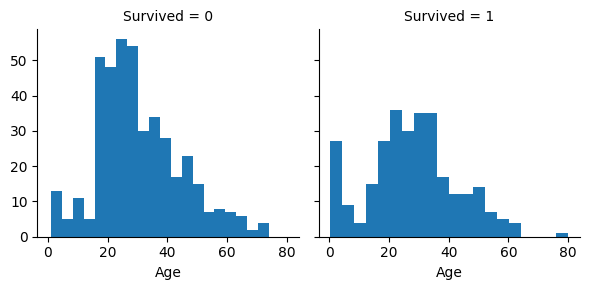

In [17]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlacionando recursos numéricos e ordinais

Podemos combinar vários recursos para identificar correlações usando um único gráfico. Isso pode ser feito com características numéricas contínuas e características categóricas que possuem valores numéricos.

** Observações **

- Pclass = 3 tinha a maioria dos passageiros, porém a maioria não sobreviveu.
- Passageiros infantis em Pclass = 2 e Pclass = 3 sobreviveram em sua maioria.
- A maioria dos passageiros em Pclass = 1 sobreviveu.
- Pclass varia em termos de distribuição etária dos passageiros.

** Decisões. **

- Considere Pclass para treinamento de modelo.

C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


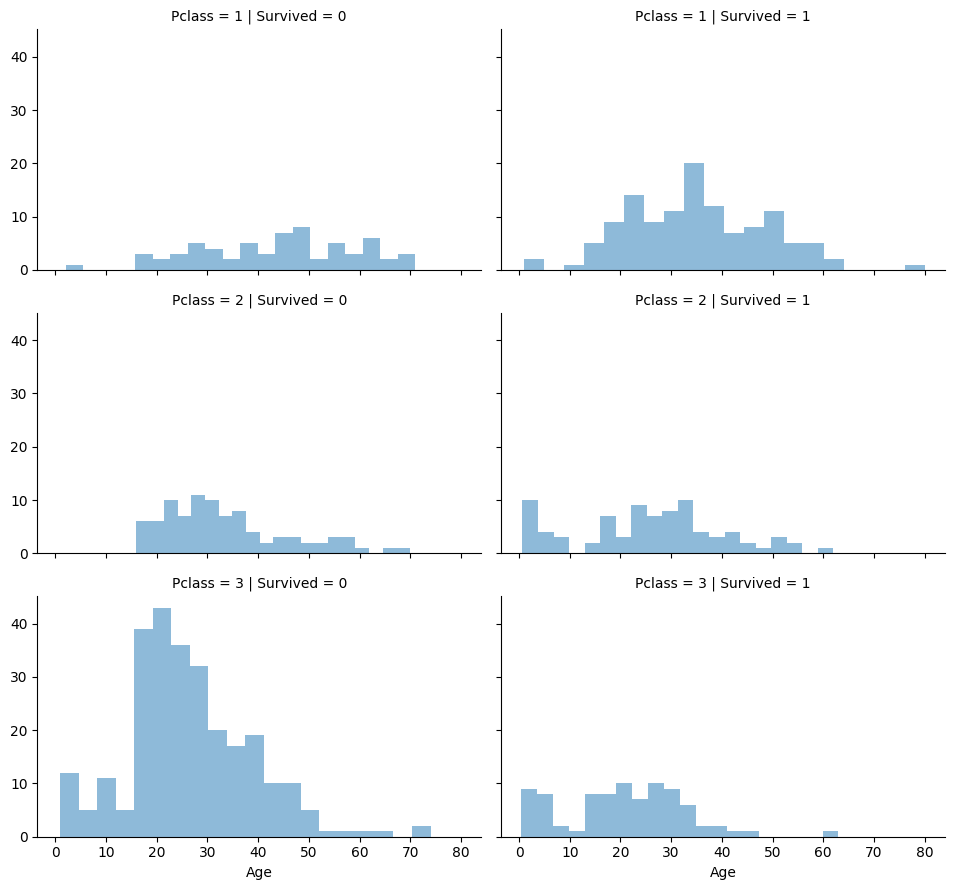

In [20]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Correlacionando características categóricas


** Observações **

- As passageiras do sexo feminino tiveram uma taxa de sobrevivência muito melhor que os homens.
- Exceção em Embarked = C, onde os homens tiveram maior taxa de sobrevivência. Isso poderia ser uma correlação entre Pclass e Embarked e, por sua vez, Pclass e Survived, não necessariamente correlação direta entre Embarcou e Sobreviveu.
- Os homens apresentaram melhor taxa de sobrevivência em Pclass = 3 quando comparados com Pclass = 2 para "embarked" C e Q.
- Portos de embarque têm taxas de sobrevivência variáveis para Pclass = 3 e entre passageiros do sexo masculino.

** Decisões. **

- Adicionar a característica de sexo para modelar o treinamento.
- Completar e adicionar a característica "embarked" para modelar o treinamento.

C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Dhiogo\AppData\Local\Packages\Python

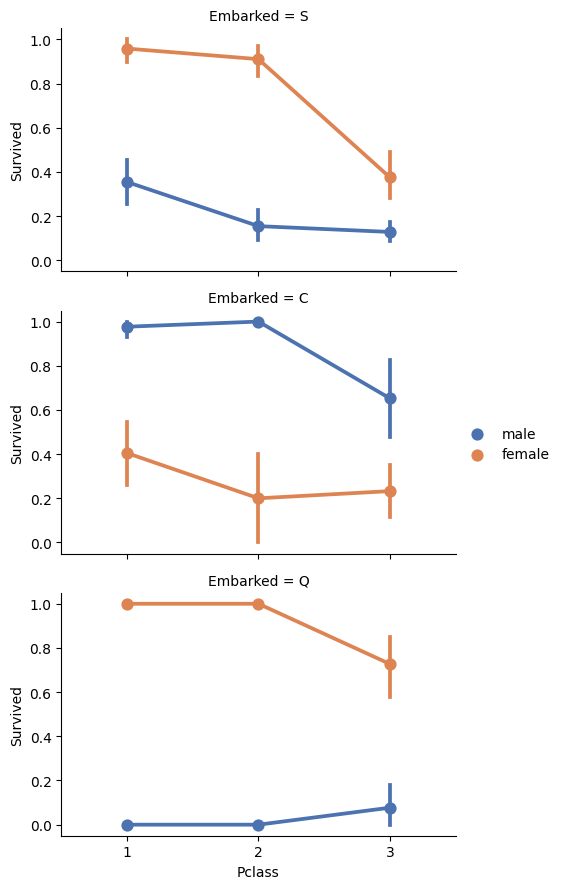

In [22]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlacionando características categóricas e numéricas

Também podemos querer correlacionar características categóricas (com valores não numéricos) e características numéricas. Podemos considerar correlacionamento de "Embarked" (Categórico não-numérico), "Sex" (Categórico não-numérico), "Fare" (Numérico contínuo), com "Survived" (Numérico categórico).

** Observações **

- Os passageiros com tarifas mais altas sobreviveram mais.
- Porto de embarque se correlacionam com as taxas de sobrevivência.

** Decisões. **

- Considere o range da característica "Fare".

C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warnin

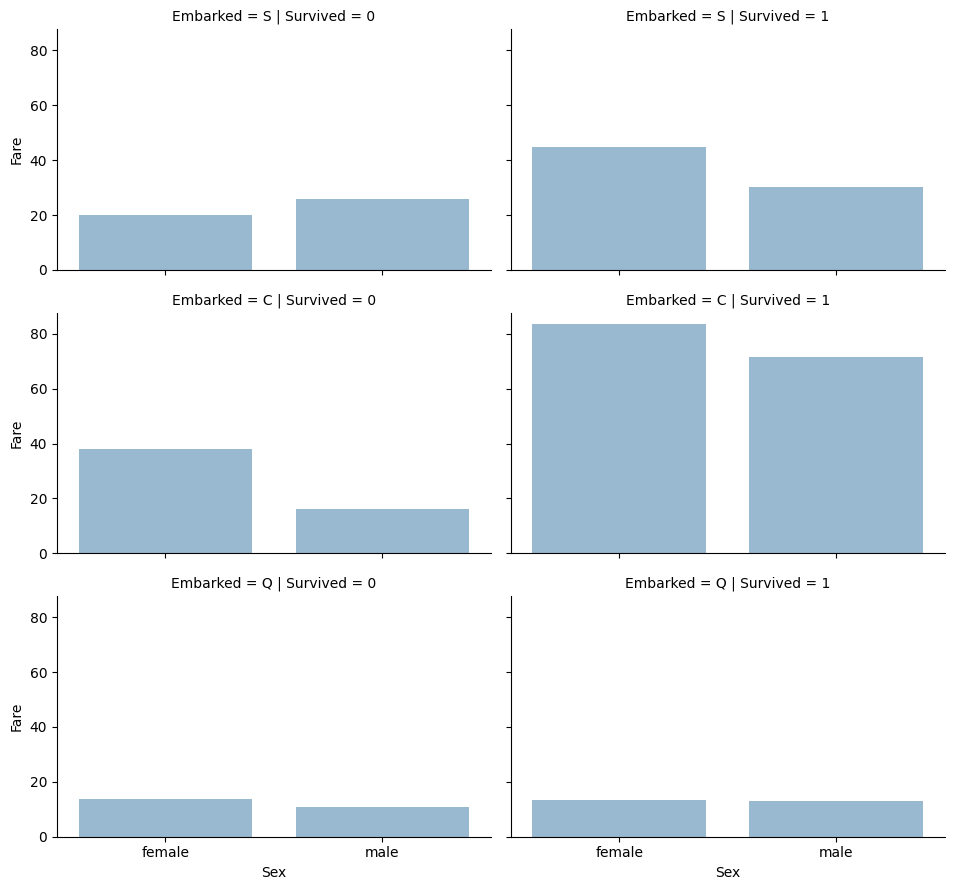

In [23]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle (disputa) de dados

Coletamos várias suposições e decisões sobre nossos conjuntos de dados e requisitos de solução. Até agora não tivemos que alterar um único recurso ou valor para chegar a eles. Vamos agora executar nossas decisões e suposições para corrigir, criar e completar metas.

### Correção pela remoção de características

Este é um bom objetivo inicial para executar. Ao descartar características, estamos lidando com menos dados. Acelera nosso processamento e facilita a análise.

Com base em nossas suposições e decisões, queremos descartar os recursos Cabine e Ticket.

Observe que, quando aplicável, realizamos operações em conjuntos de dados de treinamento e testes para permanecermos consistentes.

In [24]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Criando novas características extraídas de outras existentes

Queremos analisar se Name pode ser utilizado para extrair títulos e testar a correlação entre títulos e sobrevivência, antes de descartar essa característica.

No código a seguir, extraímos o recurso Título usando expressões regulares.

** Observações **

Quando plotamos Título, Idade e Sobrevivemos, notamos as seguintes observações.

- A maioria dos títulos agrupa grupos etários com precisão. Por exemplo: o título principal tem idade média de 5 anos.
- Sobrevivência entre as faixas de idade do título varia ligeiramente.
- Certos títulos sobreviveram principalmente (Mme, Lady, Sir) ou não (Don, Rev, Jonkheer).

**Decisão.**

- Decidimos manter o novo recurso Título para treinamento de modelo.

In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Podemos substituir muitos títulos por um nome mais comum ou classificá-los como `Rare`.

In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Nós podemos converter os títulos para dados numéricos ordinais

In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Agora nós podemos remover as características Nome e PassangerId da base.

In [28]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Convertendo uma característica categórica

Nós podemos converter características categóricas em numéricas. Isso nos ajudará na tarefa de completar dados faltantes.

Começamos transformando sexo de 'female' e 'male' para 1 e 0

In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completando uma característica numérica contínua

Agora nós vamos começar a completar dados faltantes. Começando pela característica "Age"

Podemos considerar vários métodos para isso, dentre eles:

1. O mais simples é gerar numeros aleatórios entre a média e o desvio padrão [desvio padrão](https://en.wikipedia.org/wiki/Standard_deviation).

2. Um método um pouco mais assertivo é notar a correlação entre "Age", "Sex" e "PClass". Dar um valor para "Age" pela mediana entre os valores de idade considerando combinações de "Sex" e "PClass".

3. Combinar os métodos 1 e 2.

Métodos 1 e 3 vão gerar ruído em nossos modelos (a execução desse passo múltiplas vezes irá gerar sempre resultados diferentes). Portanto ficaremos com o método 2.

C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dhiogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


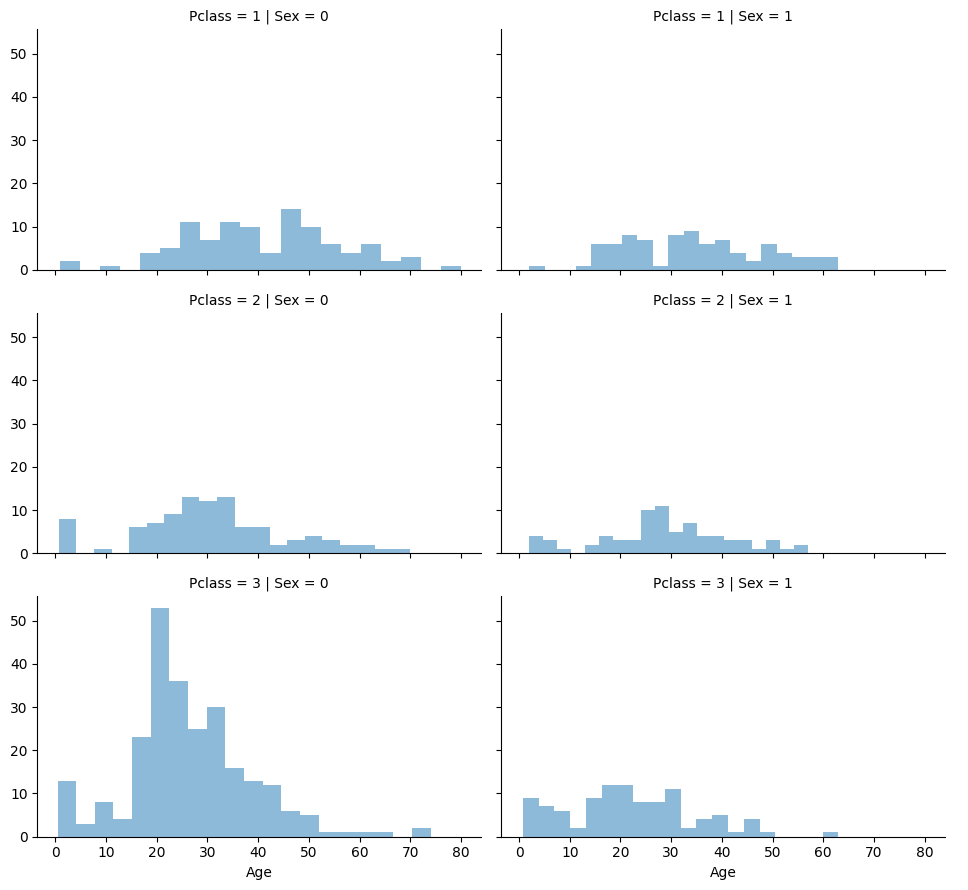

In [30]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [31]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Agora, vamos iterar sobre Sex (0 or 1) e Pclass (1, 2, 3) para "chutar" valores para Age nas seis combinações.

In [32]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()
#guess_ages

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Agora vamos construir ranges de idades e determinar correlações com Survived.

In [33]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\Dhiogo\AppData\Local\Temp\ipykernel_21520\987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Agora vamos substiuir Age pelos ranges de forma ordinal.

In [34]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Podemos remover AgeBand.

In [35]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Criando novas características a partir de características existentes

Podemos criar FamilySize pela combinação de Parch and SibSp.

In [36]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Podemos também criar uma característica chamada IsAlone.

In [37]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [38]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Também podemos criar uma característica artificial com Pclass and Age.

In [39]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completando características categóricas

Embarked utiliza os valores: S, Q, C. Nossa base de dados contém apenas dois valores faltantes. Podemos então simplesmente completá-los com a maior ocorrência.

In [40]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Convertendo características categóricas em numéricas

Podemos então converter Embarked em números ordinais (S = 0, C = 1, Q = 2)

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

Nós vamos completar os dados faltantes de "Fare" usando a moda (valor mais frequente).

Vamos também arredondar os valores para duas casas decimais.

In [43]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Nós podemeos criar um range desses valores (FareBrand)

In [44]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\Dhiogo\AppData\Local\Temp\ipykernel_21520\2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Converter Fare como valor ordinal.

In [45]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


E a base de testes...

In [46]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Modelo, predição e resolução

Agora estamos prontos para treinar um modelo e prever a solução necessária. Existem mais de 60 algoritmos de modelagem preditiva para escolher. Devemos entender o tipo de problema e o requisito de solução para restringir a alguns modelos selecionados que podemos avaliar. Nosso problema é um problema de classificação. Queremos identificar a relação entre saída (Sobreveu ou não) com outras variáveis (Sexo, Idade, Embarque ...). 

Estamos realizando uma categoria de aprendizado de máquina que é chamada de aprendizado supervisionado, pois estamos treinando nosso modelo com um determinado conjunto de dados com classe conhecida. Com esses dois critérios - Aprendizado Supervisionado mais Classificação, podemos restringir nossa escolha de modelos a alguns. Esses incluem:

- Support Vector Machines
- Naive Bayes
- Árvore de decisão

In [47]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Vamos modelar usando Support Vector Machines. O SVM é um classificador binário não probabilístico, ou seja, ele dirá em qual de ** duas classes ** aquele exemplo se encontra (hiperplano). [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note que o modelo gera um grau de confiança.

In [48]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

No aprendizado de máquina, os classificadores Bayesianos são uma família de classificadores probabilísticos simples baseados na aplicação do teorema de Bayes com pressupostos de independência fortes (ingênuos) entre os recursos. Os classificadores Naive Bayes são altamente escalonáveis, exigindo um número de parâmetros lineares no número de variáveis (características) em um problema de aprendizado.
Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [49]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

Esse modelo usa uma árvore de decisão como um modelo preditivo que mapeia características (ramos de árvore) para conclusões sobre o valor de destino (folhas de árvores). Nessas estruturas de árvore, as folhas representam os rótulos de classes e os ramos representam conjunções de características que levam a esses rótulos de classe. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

A confiança do modelo é a melhor até agora.

In [50]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_svc, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,86.76
0,Support Vector Machines,78.23
1,Naive Bayes,72.28


In [52]:
test_df_no_alter = pd.read_csv('test.csv')

result = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Age": test_df_no_alter["Age"],
        "Pclass": test_df_no_alter["Pclass"],
        "Sex": test_df_no_alter["Sex"],
        "Fare": test_df_no_alter["Fare"],
        "Survived": Y_pred
    })
result.head()

,PassengerId,Age,Pclass,Sex,Fare,Survived
0,892,34.5,3,male,7.8292,0
1,893,47.0,3,female,7.0000,0
2,894,62.0,2,male,9.6875,0
3,895,27.0,3,male,8.6625,0
4,896,22.0,3,female,12.2875,1


In [54]:
result.to_csv('submission.csv', index=False)

## Referências

- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)